k = 8
Number of extreme point = 10
new_extreme = [0.0, 0.056600000000000004, 0.1131, 0.16620000000000001, 0.2, 0.25, 0.2873, 0.34440000000000004, 0.4071, 0.5]
max_err = 1.2362984401511379
new_extreme = [0.0, 0.0604, 0.1198, 0.17350000000000002, 0.2, 0.25, 0.2823, 0.34440000000000004, 0.41750000000000004, 0.5]
max_err = 0.7704144356675102
new_extreme = [0.0, 0.0611, 0.12050000000000001, 0.17350000000000002, 0.2, 0.25, 0.2827, 0.34540000000000004, 0.4184, 0.5]
max_err = 0.7127611617996485
new_extreme = [0.0, 0.0611, 0.12050000000000001, 0.17350000000000002, 0.2, 0.25, 0.2827, 0.34540000000000004, 0.4184, 0.5]
max_err = 0.7120728523467945
new_extreme = [0.0, 0.0611, 0.12050000000000001, 0.17350000000000002, 0.2, 0.25, 0.2827, 0.34540000000000004, 0.4184, 0.5]
max_err = 0.7120728523467945
final_max_err = 0.7120728523467945
final_S = [ 0.45278066  0.62665323  0.09264393 -0.1861376  -0.07947915  0.0699275
  0.10988455 -0.10538617 -0.05209422  0.71207285]
h = [-0.026047110362287268, -0.052693

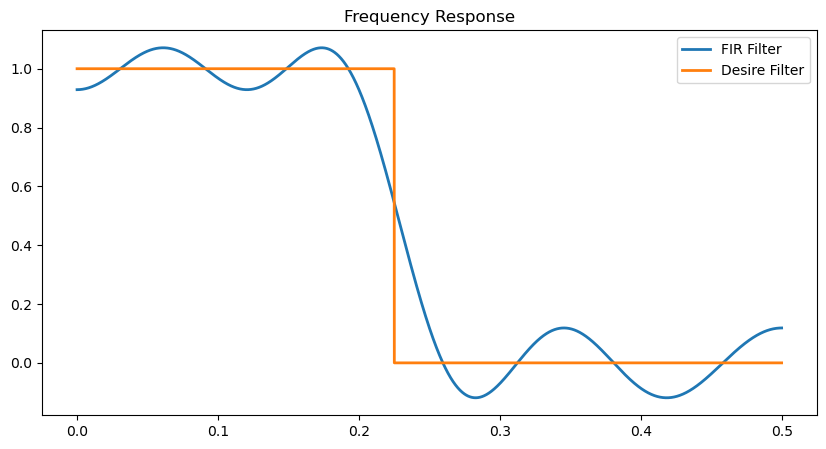

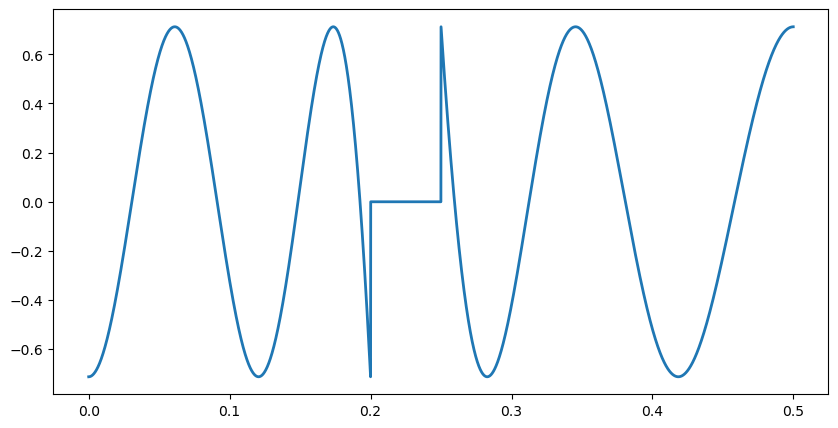

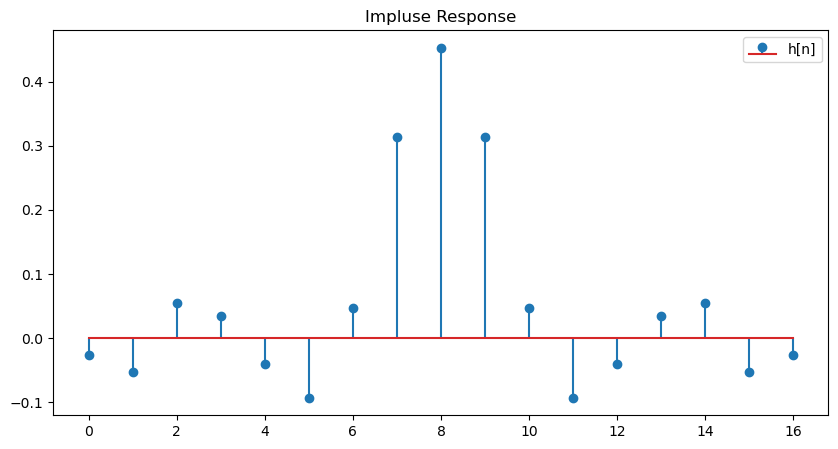

In [1]:
import numpy as np
from math import *
from numpy.linalg import inv
import matplotlib.pyplot as plt


N = 17
DELTA_F = 1e-4
WEIGHT = ((0, 0.2, 10), (0.25, 0.5, 6))
H_D_PASS = (0, 0.225)
F_m = [0, 0.05, 0.1, 0.15, 0.19, 0.26, 0.3, 0.35, 0.4, 0.45]



k = int((N-1)/2)
print(f"k = {k}")
N_EXP = k+2
print(f"Number of extreme point = {N_EXP}")

def W(x): 
    if WEIGHT[0][0] <= x <= WEIGHT[0][1]: 
        return WEIGHT[0][2]
    elif WEIGHT[1][0] <= x <= WEIGHT[1][1] : 
        return WEIGHT[1][2]
    else: 
        return 0

def H_d(x): 
    if H_D_PASS[0] <= x <= H_D_PASS[1]:  
        return 1
    else: 
        return 0

def err(F, S): 
    return ( R_F(F, S) - H_d(F) ) * W(F)

def R_F(F, S): 
    ans = 0 
    for n in range(k+1):
        ans += S[n]*cos(2*pi*n*F)
    return ans

max_err_last = 99999999999999999
while True:

    A = []
    for m in range(k+2):
        row = []
        for n in range(k+2):
            if n == 0:
                row.append(1)
            elif n == k+1: 
                row.append( ( (-1)**m ) / W(F_m[m]) )
            else:
                row.append(cos(2*n*pi*F_m[m]))
        A.append(row)


    A = np.array(A)

    A_inv = inv(A)

    b = []
    for m in range(k+2):
        b.append(H_d(F_m[m]))
    b = np.array(b)


    S = np.matmul(A_inv, b)

    new_extreme = []
    max_err = -1
    F_ll = None
    F_l  = None
    for i in range(int(0.5 / DELTA_F)+2): # TODO add zero to the begin and the end
        if i == 0: continue
        if i == 1:
            F_ll = 0
            F_l  = err(0*DELTA_F, S)
        if i == int(0.5 / DELTA_F)+1:
            F = 0
        else:
            F = err(i*DELTA_F, S)
        

        if  F_l - F > 0 and F_l - F_ll > 0 or \
            F_l - F < 0 and F_l - F_ll < 0: 
            new_extreme.append((i-1)*DELTA_F)
            if max_err < abs(F_l):
                max_err = abs(F_l)
        

        F_ll = F_l
        F_l = F

    print(f"new_extreme = {new_extreme}")
    print(f"max_err = {max_err}")
    
    if 0 <= max_err_last - max_err <= DELTA_F:
        print(f"final_max_err = {max_err}")
        print(f"final_S = {S}")
        break

    max_err_last = max_err
    F_m = new_extreme[:k+2]



h = []
for i in range(N):
    if i < k:
        h.append(S[k-i]/2)
    elif i == k:
        h.append(S[0])
    else:  # i > k 
        h.append(S[i-k]/2)

print(f"h = {h}")


plt.figure(figsize=(10,5))

t = np.arange(0.0, 0.5, DELTA_F)
plt.plot(t, np.array([ R_F(t[i], S) for i in range(len(t)) ]), lw=2)
plt.plot(t, np.array([ H_d(t[i])    for i in range(len(t)) ]), lw=2)
plt.legend(['FIR Filter', 'Desire Filter']) 
plt.title("Frequency Response")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, np.array([ err(t[i], S) for i in range(len(t)) ]), lw=2)
plt.show()

plt.figure(figsize=(10,5))
t = np.arange(0, N)
plt.stem(t, np.array([ h[i] for i in range(len(t)) ]))
plt.legend(['h[n]']) 
plt.title("Impluse Response")
plt.show()

